## CMPINF 2110 Spring 2022 - Week 02

### Tidying the shoe data set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

## Read data

The Excel Workbook should be downloaded and located in the current working directory.

In [2]:
file_name = 'week_02_shoe_counts.xlsx'

In [3]:
pd.read_excel( file_name )

,W,B,R,O
0,12,5,3,15
1,5,8,6,20
2,9,22,7,13
3,4,2,1,7


We need to specify the `sheet_name` argument to reach a separate SHEET or TAB within the Workbook.

In [4]:
pd.read_excel( file_name, sheet_name='Dunkin' )

,W,B,R,O
0,9,8,2,11
1,9,3,8,14
2,2,11,13,5
3,5,8,3,12


But how can we do this programmatically? Let's identify the sheets contained within the Excel Workbook via the ExcelFile class.

In [5]:
excel_object = pd.ExcelFile(file_name)

In [6]:
type( excel_object )

pandas.io.excel._base.ExcelFile

In [7]:
dir(excel_object)

['ODFReader',
 'OpenpyxlReader',
 'PyxlsbReader',
 'XlrdReader',
 '__annotations__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__fspath__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_engines',
 '_io',
 '_reader',
 'book',
 'close',
 'engine',
 'io',
 'parse',
 'sheet_names',
 'storage_options']

In [8]:
excel_object.sheet_names

['Noodles', 'Dunkin', 'Panera']

In [9]:
excel_object.sheet_names[1]

'Dunkin'

In [10]:
pd.read_excel( file_name, sheet_name=excel_object.sheet_names[0])

,W,B,R,O
0,12,5,3,15
1,5,8,6,20
2,9,22,7,13
3,4,2,1,7


A second way to read a sheet using the `.parse()` method associated with the ExcelFile object.

In [11]:
excel_object.parse( excel_object.sheet_names[0] )

,W,B,R,O
0,12,5,3,15
1,5,8,6,20
2,9,22,7,13
3,4,2,1,7


Let's read in and define objects for the Noodles and Dunkin data sets.

In [13]:
noodles_counts = pd.read_excel( file_name, sheet_name=excel_object.sheet_names[0] )

In [14]:
dunkin_counts = excel_object.parse( excel_object.sheet_names[1] )

The Noodles data set:

In [15]:
noodles_counts

,W,B,R,O
0,12,5,3,15
1,5,8,6,20
2,9,22,7,13
3,4,2,1,7


The Dunkin data set:

In [16]:
dunkin_counts

,W,B,R,O
0,9,8,2,11
1,9,3,8,14
2,2,11,13,5
3,5,8,3,12


## Are these data sets messy or tidy?

In [17]:
noodles_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   W       4 non-null      int64
 1   B       4 non-null      int64
 2   R       4 non-null      int64
 3   O       4 non-null      int64
dtypes: int64(4)
memory usage: 256.0 bytes


The structure of the tidy data is follows the OBSERVATIONAL UNIT:

| day | location | shoe | count |

## Tidying the data - option 1

Before tidying, let's create copies of the original data frames.

In [37]:
noodles_df = noodles_counts.copy()

dunkin_df = dunkin_counts.copy()

Include a variable for the LOCATION that the data were recorded at.

In [38]:
noodles_df['location'] = 'N'

dunkin_df['location'] = 'D'

In [20]:
noodles_df

,W,B,R,O,location
0,12,5,3,15,N
1,5,8,6,20,N
2,9,22,7,13,N
3,4,2,1,7,N


In [21]:
dunkin_df

,W,B,R,O,location
0,9,8,2,11,D
1,9,3,8,14,D
2,2,11,13,5,D
3,5,8,3,12,D


We may be tempting to merge or combine the two data sets together...

In [22]:
pd.concat([noodles_df, dunkin_df])

,W,B,R,O,location
0,12,5,3,15,N
1,5,8,6,20,N
2,9,22,7,13,N
3,4,2,1,7,N
0,9,8,2,11,D
1,9,3,8,14,D
2,2,11,13,5,D
3,5,8,3,12,D


COMMON PITFALL: The columns are storing VALUES of a variable and NOT the name of the variable!!!!

To overcome values as column headers we must reshape to LONG FORMAT.

Reshape the noodles data set into long-format, but first add in an index for the DAY.

In [24]:
noodles_df['day'] = noodles_df.index.to_numpy() + 1

In [25]:
noodles_df

,W,B,R,O,location,day
0,12,5,3,15,N,1
1,5,8,6,20,N,2
2,9,22,7,13,N,3
3,4,2,1,7,N,4


Now reshape into long-format.

In [26]:
noodles_df.copy().\
melt(id_vars=['day', 'location'], value_vars=['W', 'B', 'R', 'O'])

,day,location,variable,value
0,1,N,W,12
1,2,N,W,5
2,3,N,W,9
3,4,N,W,4
4,1,N,B,5
5,2,N,B,8
6,3,N,B,22
7,4,N,B,2
8,1,N,R,3
9,2,N,R,6


In [27]:
noodles_df.copy().\
melt(id_vars=['day', 'location'], value_vars=['W', 'B', 'R', 'O'],
     var_name='shoe', value_name='count')

,day,location,shoe,count
0,1,N,W,12
1,2,N,W,5
2,3,N,W,9
3,4,N,W,4
4,1,N,B,5
5,2,N,B,8
6,3,N,B,22
7,4,N,B,2
8,1,N,R,3
9,2,N,R,6


In [28]:
noodles_lf = noodles_df.copy().\
melt(id_vars=['day', 'location'], value_vars=['W', 'B', 'R', 'O'],
     var_name='shoe', value_name='count')

In [29]:
noodles_lf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   day       16 non-null     int64 
 1   location  16 non-null     object
 2   shoe      16 non-null     object
 3   count     16 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 640.0+ bytes


In [39]:
dunkin_df['day'] = dunkin_df.index.to_numpy() + 1

In [40]:
dunkin_lf = dunkin_df.copy().\
melt(id_vars=['day', 'location'], value_vars=['W', 'B', 'R', 'O'],
     var_name='shoe', value_name='count')

In [41]:
dunkin_lf

,day,location,shoe,count
0,1,D,W,9
1,2,D,W,9
2,3,D,W,2
3,4,D,W,5
4,1,D,B,8
5,2,D,B,3
6,3,D,B,11
7,4,D,B,8
8,1,D,R,2
9,2,D,R,8


Because each of the two long-format data sets correctly have the ROW as an OBSERVATIONAL UNIT, we can now combine them together!

In [44]:
tidy_lf = pd.concat([noodles_lf, dunkin_lf], ignore_index=True)

In [45]:
tidy_lf

,day,location,shoe,count
0,1,N,W,12
1,2,N,W,5
2,3,N,W,9
3,4,N,W,4
4,1,N,B,5
5,2,N,B,8
6,3,N,B,22
7,4,N,B,2
8,1,N,R,3
9,2,N,R,6


Tidy data sets are easy to manipulate and summarize. No information was lost from the original data sets!

In [46]:
tidy_lf.nunique()

day          4
location     2
shoe         4
count       16
dtype: int64

The total number or count for each shoe color.

In [47]:
tidy_lf.groupby(['shoe']).\
aggregate(total_count = ('count', 'sum')).\
reset_index()

,shoe,total_count
0,B,67
1,O,97
2,R,43
3,W,55


Seaborn prefers tidy long format data!

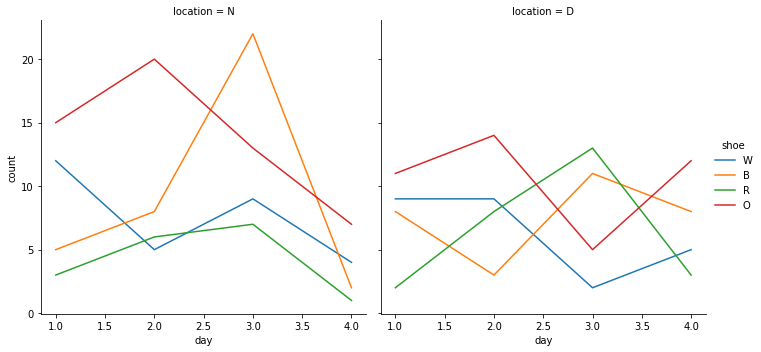

In [48]:
sns.relplot(data = tidy_lf, x='day', y='count', hue='shoe', col='location', kind='line',
            estimator=None)

plt.show()

## Tidying the data -- option 2

Tidy the data set again but from a different starting point.

In [49]:
noodles_copy = noodles_counts.copy()

dunkin_copy = dunkin_counts.copy()

In [50]:
noodles_copy

,W,B,R,O
0,12,5,3,15
1,5,8,6,20
2,9,22,7,13
3,4,2,1,7


In [51]:
dunkin_copy

,W,B,R,O
0,9,8,2,11
1,9,3,8,14
2,2,11,13,5
3,5,8,3,12


A common way to include more information is to modify the column headers rather than adding columns to a data set.

For example, we could include the location value to be part of the column header.

In [52]:
print( 'N_R' ) ### NOODLES to the left of UNDERSCORE and RED to the right of UNDERSCORE

print( 'D_O' ) ### DUNKIN to the left of UNDERSCORE and OTHER to the right of UNDERSCORE

N_R
D_O


In [53]:
['N' + '_' + shoe for shoe in noodles_counts.columns.to_list()]

['N_W', 'N_B', 'N_R', 'N_O']

In [54]:
['D' + '_' + shoe for shoe in dunkin_counts.columns.to_list()]

['D_W', 'D_B', 'D_R', 'D_O']

Overwrite the column names in the copied wide-format data sets.

In [55]:
noodles_copy.columns = ['N' + '_' + shoe for shoe in noodles_counts.columns.to_list()]

dunkin_copy.columns = ['D' + '_' + shoe for shoe in dunkin_counts.columns.to_list()]

In [56]:
noodles_copy

,N_W,N_B,N_R,N_O
0,12,5,3,15
1,5,8,6,20
2,9,22,7,13
3,4,2,1,7


In [57]:
dunkin_copy

,D_W,D_B,D_R,D_O
0,9,8,2,11
1,9,3,8,14
2,2,11,13,5
3,5,8,3,12


We can combine or concatenate the two data sets horizontally.

In [58]:
shoes_wf = pd.concat([noodles_copy, dunkin_copy], axis=1)

In [59]:
shoes_wf

,N_W,N_B,N_R,N_O,D_W,D_B,D_R,D_O
0,12,5,3,15,9,8,2,11
1,5,8,6,20,9,3,8,14
2,9,22,7,13,2,11,13,5
3,4,2,1,7,5,8,3,12


Let's go about tidying this wide-format data set with multiple variables per column.

We must reshape to long-format again.

In [60]:
### extract the location+shoe type column name

loc_shoe_name = shoes_wf.columns.to_list()

In [61]:
loc_shoe_name

['N_W', 'N_B', 'N_R', 'N_O', 'D_W', 'D_B', 'D_R', 'D_O']

Add in a variable dedicated to the day.

In [62]:
shoes_wf['day'] = shoes_wf.index.to_numpy() + 1

In [63]:
shoes_wf

,N_W,N_B,N_R,N_O,D_W,D_B,D_R,D_O,day
0,12,5,3,15,9,8,2,11,1
1,5,8,6,20,9,3,8,14,2
2,9,22,7,13,2,11,13,5,3
3,4,2,1,7,5,8,3,12,4


Melt from wide to long-format.

In [64]:
shoes_lf = shoes_wf.copy().melt(id_vars=['day'], value_vars=loc_shoe_name, value_name='count')

In [65]:
shoes_lf

,day,variable,count
0,1,N_W,12
1,2,N_W,5
2,3,N_W,9
3,4,N_W,4
4,1,N_B,5
5,2,N_B,8
6,3,N_B,22
7,4,N_B,2
8,1,N_R,3
9,2,N_R,6


To create the tidy data set, we need to SPLIT or SEPARATE the `variable` column into TWO columns. The `variable` column as is stores multiple variables and we need ONE variable per column.

The `.str.split()` method associated with a STRING or OBJECT column (Series) allows us to SPLIT a string **ON** a pattern.

In [67]:
shoes_lf.variable.str.split('_')

0     [N, W]
1     [N, W]
2     [N, W]
3     [N, W]
4     [N, B]
5     [N, B]
6     [N, B]
7     [N, B]
8     [N, R]
9     [N, R]
10    [N, R]
11    [N, R]
12    [N, O]
13    [N, O]
14    [N, O]
15    [N, O]
16    [D, W]
17    [D, W]
18    [D, W]
19    [D, W]
20    [D, B]
21    [D, B]
22    [D, B]
23    [D, B]
24    [D, R]
25    [D, R]
26    [D, R]
27    [D, R]
28    [D, O]
29    [D, O]
30    [D, O]
31    [D, O]
Name: variable, dtype: object

In [68]:
type( shoes_lf.variable.str.split('_') )

pandas.core.series.Series

In [69]:
type( shoes_lf.variable.str.split('_')[0] )

list

In [70]:
shoes_lf.variable.str.split('_')[0]

['N', 'W']

In [71]:
shoes_lf.variable.str.split('_')[0][0]

'N'

In [72]:
shoes_lf.variable.str.split('_')[0][1]

'W'

The `expand` argument within `str.split()` saves a lot of time...

In [73]:
shoes_lf.variable.str.split('_', expand=True)

,0,1
0,N,W
1,N,W
2,N,W
3,N,W
4,N,B
5,N,B
6,N,B
7,N,B
8,N,R
9,N,R


It's now easy to add the new columns to the long-format data set.

In [74]:
shoes_lf[['location', 'shoe']] = shoes_lf.variable.str.split('_', expand=True)

In [75]:
shoes_lf

,day,variable,count,location,shoe
0,1,N_W,12,N,W
1,2,N_W,5,N,W
2,3,N_W,9,N,W
3,4,N_W,4,N,W
4,1,N_B,5,N,B
5,2,N_B,8,N,B
6,3,N_B,22,N,B
7,4,N_B,2,N,B
8,1,N_R,3,N,R
9,2,N_R,6,N,R


We can drop the `variable` column because it's not necessary.

In [76]:
shoes_lf.drop(['variable'], axis=1, inplace=True)

In [77]:
shoes_lf

,day,count,location,shoe
0,1,12,N,W
1,2,5,N,W
2,3,9,N,W
3,4,4,N,W
4,1,5,N,B
5,2,8,N,B
6,3,22,N,B
7,4,2,N,B
8,1,3,N,R
9,2,6,N,R


Reorder the columns to have the same order as the previous tidy version we created.

In [80]:
shoes_lf = shoes_lf[ tidy_lf.columns ].copy()

In [81]:
shoes_lf

,day,location,shoe,count
0,1,N,W,12
1,2,N,W,5
2,3,N,W,9
3,4,N,W,4
4,1,N,B,5
5,2,N,B,8
6,3,N,B,22
7,4,N,B,2
8,1,N,R,3
9,2,N,R,6


Tidy data sets are easy to manipulate for example it's easy to filter or subset. We can find all rows with Red shoes.

In [82]:
shoes_lf.loc[ shoes_lf.shoe == 'R', :]

,day,location,shoe,count
8,1,N,R,3
9,2,N,R,6
10,3,N,R,7
11,4,N,R,1
24,1,D,R,2
25,2,D,R,8
26,3,D,R,13
27,4,D,R,3


All observations associated with day 4:

In [83]:
shoes_lf.loc[ shoes_lf.day == 4, : ]

,day,location,shoe,count
3,4,N,W,4
7,4,N,B,2
11,4,N,R,1
15,4,N,O,7
19,4,D,W,5
23,4,D,B,8
27,4,D,R,3
31,4,D,O,12


All observations or Red OR Other shoes:

In [84]:
shoes_lf.loc[ shoes_lf.shoe.isin(['R', 'O']), :]

,day,location,shoe,count
8,1,N,R,3
9,2,N,R,6
10,3,N,R,7
11,4,N,R,1
12,1,N,O,15
13,2,N,O,20
14,3,N,O,13
15,4,N,O,7
24,1,D,R,2
25,2,D,R,8


All observations of Red OR Other shoes when the day ID is less than 3:

In [85]:
shoes_lf.loc[ (shoes_lf.shoe.isin(['R', 'O'])) & (shoes_lf.day < 3), :]

,day,location,shoe,count
8,1,N,R,3
9,2,N,R,6
12,1,N,O,15
13,2,N,O,20
24,1,D,R,2
25,2,D,R,8
28,1,D,O,11
29,2,D,O,14


We can easily group and summarize (aggregate). Calculate the total count for each shoe color.

In [86]:
shoes_lf.groupby(['shoe']).\
aggregate(total_count = ('count', 'sum')).\
reset_index()

,shoe,total_count
0,B,67
1,O,97
2,R,43
3,W,55


Double check by filtering and then applying the `sum()` function.

In [87]:
shoes_lf.loc[ shoes_lf.shoe.isin(['O']), :]['count'].sum()

97

What is the total count for each shoe color at each location? 

In [89]:
shoes_lf.groupby(['location', 'shoe']).\
aggregate(total_count = ('count', 'sum'),
          num_days = ('day', 'nunique'),
          day_num_nonmissing = ('day', 'count'),
          day_num_rows = ('day', 'size')).\
reset_index()

,location,shoe,total_count,num_days,day_num_nonmissing,day_num_rows
0,D,B,30,4,4,4
1,D,O,42,4,4,4
2,D,R,26,4,4,4
3,D,W,25,4,4,4
4,N,B,37,4,4,4
5,N,O,55,4,4,4
6,N,R,17,4,4,4
7,N,W,30,4,4,4


## Add data to tidy data

Remember we had 3 sheets in the Excel workbook.

In [90]:
excel_object.sheet_names

['Noodles', 'Dunkin', 'Panera']

Let's add the Panera data set to our existing tidy data set.

First, read in the Panera sheet as a Pandas DataFrame.

In [91]:
panera_counts = pd.read_excel( file_name, sheet_name=excel_object.sheet_names[2] )

In [92]:
panera_counts

,day,W,B,R,O
0,2,9,3,4,15
1,3,7,4,5,11


Reshape this data set into long format.

In [93]:
panera_lf = panera_counts.copy().melt(id_vars=['day'], value_vars=['W', 'B', 'R', 'O'], 
                                      var_name='shoe', value_name='count')

In [94]:
panera_lf

,day,shoe,count
0,2,W,9
1,3,W,7
2,2,B,3
3,3,B,4
4,2,R,4
5,3,R,5
6,2,O,15
7,3,O,11


Add in a column for the `location`.

In [95]:
panera_lf['location'] = 'P'

In [96]:
panera_lf

,day,shoe,count,location
0,2,W,9,P
1,3,W,7,P
2,2,B,3,P
3,3,B,4,P
4,2,R,4,P
5,3,R,5,P
6,2,O,15,P
7,3,O,11,P


Reorder the columns to be consistent with the previous tidy data sets we created.

In [97]:
panera_lf = panera_lf[ shoes_lf.columns ].copy()

In [98]:
panera_lf

,day,location,shoe,count
0,2,P,W,9
1,3,P,W,7
2,2,P,B,3
3,3,P,B,4
4,2,P,R,4
5,3,P,R,5
6,2,P,O,15
7,3,P,O,11


Concatenate or combine the rows between the tidy long format data and the new tidy panera data set.

In [99]:
tidy_all = pd.concat([shoes_lf, panera_lf], ignore_index=True)

In [100]:
tidy_all

,day,location,shoe,count
0,1,N,W,12
1,2,N,W,5
2,3,N,W,9
3,4,N,W,4
4,1,N,B,5
5,2,N,B,8
6,3,N,B,22
7,4,N,B,2
8,1,N,R,3
9,2,N,R,6


If we want we can rearrange the rows to have ascending `day` order.

In [101]:
tidy_all.sort_values(['day'])

,day,location,shoe,count
0,1,N,W,12
20,1,D,B,8
28,1,D,O,11
16,1,D,W,9
8,1,N,R,3
12,1,N,O,15
24,1,D,R,2
4,1,N,B,5
21,2,D,B,3
1,2,N,W,5


In [102]:
tidy_all.sort_values(['day'], ignore_index=True)

,day,location,shoe,count
0,1,N,W,12
1,1,D,B,8
2,1,D,O,11
3,1,D,W,9
4,1,N,R,3
5,1,N,O,15
6,1,D,R,2
7,1,N,B,5
8,2,D,B,3
9,2,N,W,5


Modify the the sorted DataFrame in place.

In [103]:
tidy_all.sort_values(['day'], ignore_index=True, inplace=True)

In [104]:
tidy_all

,day,location,shoe,count
0,1,N,W,12
1,1,D,B,8
2,1,D,O,11
3,1,D,W,9
4,1,N,R,3
5,1,N,O,15
6,1,D,R,2
7,1,N,B,5
8,2,D,B,3
9,2,N,W,5


What is the AVERAGE daily count for each shoe color at a location?

In [105]:
shoe_summary = tidy_all.groupby(['location', 'shoe']).\
aggregate(total_count = ('count', 'sum'),
          num_days = ('day', 'nunique')).\
reset_index()

In [106]:
shoe_summary

,location,shoe,total_count,num_days
0,D,B,30,4
1,D,O,42,4
2,D,R,26,4
3,D,W,25,4
4,N,B,37,4
5,N,O,55,4
6,N,R,17,4
7,N,W,30,4
8,P,B,7,2
9,P,O,26,2


In [107]:
shoe_summary['avg_count_per_day'] = shoe_summary.total_count / shoe_summary.num_days

In [108]:
shoe_summary

,location,shoe,total_count,num_days,avg_count_per_day
0,D,B,30,4,7.50
1,D,O,42,4,10.50
2,D,R,26,4,6.50
3,D,W,25,4,6.25
4,N,B,37,4,9.25
5,N,O,55,4,13.75
6,N,R,17,4,4.25
7,N,W,30,4,7.50
8,P,B,7,2,3.50
9,P,O,26,2,13.00


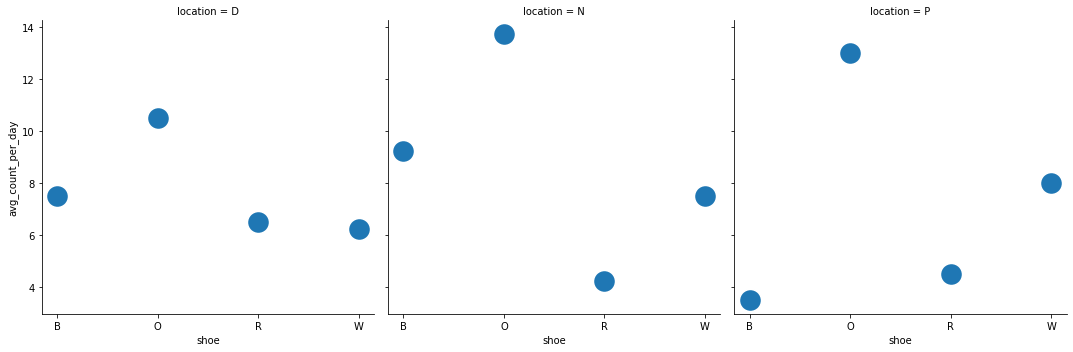

In [110]:
sns.relplot(data = shoe_summary, x='shoe', y='avg_count_per_day', col='location', s=500)

plt.show()

## Long to Wide-Format reshaping

Is wide-format a bad thing???????? NO!!! Depends on the context.

Tidy data can be quite easy to reshape to support any analysis we are interested in.

For example, a question that the tidy long-format **cannot** directly answer is how does one shoe color relate to another? I want to make a scatter plot between Red and Other shoes.

To answer we must RESHAPE from long to wide in Pandas with the `.pivot()` method.

In [111]:
tidy_all.pivot(index=['day', 'location'], columns='shoe', values='count')

shoe           B   O   R   W
day location                
1   D          8  11   2   9
    N          5  15   3  12
2   D          3  14   8   9
    N          8  20   6   5
    P          3  15   4   9
3   D         11   5  13   2
    N         22  13   7   9
    P          4  11   5   7
4   D          8  12   3   5
    N          2   7   1   4

In [114]:
tidy_all.pivot(index=['day', 'location'], columns='shoe', values='count').reset_index()

shoe,day,location,B,O,R,W
0,1,D,8,11,2,9
1,1,N,5,15,3,12
2,2,D,3,14,8,9
3,2,N,8,20,6,5
4,2,P,3,15,4,9
5,3,D,11,5,13,2
6,3,N,22,13,7,9
7,3,P,4,11,5,7
8,4,D,8,12,3,5
9,4,N,2,7,1,4


Create the scatter plot between the Red shoes and the Other shoes.

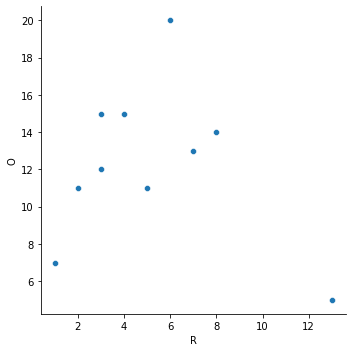

In [115]:
sns.relplot(data = tidy_all.pivot(index=['day', 'location'], columns='shoe', values='count').reset_index(),
            x='R', y='O')

plt.show()

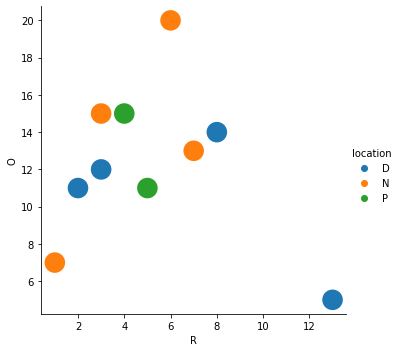

In [116]:
sns.relplot(data = tidy_all.pivot(index=['day', 'location'], columns='shoe', values='count').reset_index(),
            x='R', y='O', hue='location',s=500)

plt.show()

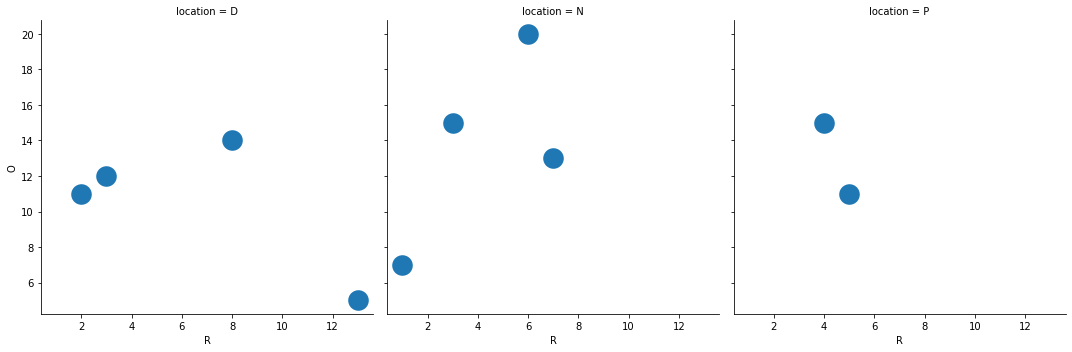

In [117]:
sns.relplot(data = tidy_all.pivot(index=['day', 'location'], columns='shoe', values='count').reset_index(),
            x='R', y='O', col='location',s=500)

plt.show()

We can also organize the data where 1 row is one day and one column is the combination of location and shoe.

In [118]:
tidy_all.pivot(index=['day'], columns=['location', 'shoe'], values='count')

location     N     D               N           D     N     P               
shoe         W     B     O    W    R     O     R     B     O    R    W    B
day                                                                        
1         12.0   8.0  11.0  9.0  3.0  15.0   2.0   5.0   NaN  NaN  NaN  NaN
2          5.0   3.0  14.0  9.0  6.0  20.0   8.0   8.0  15.0  4.0  9.0  3.0
3          9.0  11.0   5.0  2.0  7.0  13.0  13.0  22.0  11.0  5.0  7.0  4.0
4          4.0   8.0  12.0  5.0  1.0   7.0   3.0   2.0   NaN  NaN  NaN  NaN

When we convert or reshape from long to wide...depending on the new ROW definition...we may see MISSINGS appear!!!!!